<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#算法简介" data-toc-modified-id="算法简介-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>算法简介</a></span></li><li><span><a href="#推导过程" data-toc-modified-id="推导过程-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>推导过程</a></span></li><li><span><a href="#Python-实现" data-toc-modified-id="Python-实现-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Python 实现</a></span><ul class="toc-item"><li><span><a href="#数据prepare" data-toc-modified-id="数据prepare-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>数据prepare</a></span></li><li><span><a href="#算法实现" data-toc-modified-id="算法实现-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>算法实现</a></span></li><li><span><a href="#结果展示" data-toc-modified-id="结果展示-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>结果展示</a></span></li></ul></li><li><span><a href="#scikit-learn实现" data-toc-modified-id="scikit-learn实现-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>scikit-learn实现</a></span><ul class="toc-item"><li><span><a href="#prepare数据" data-toc-modified-id="prepare数据-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>prepare数据</a></span></li><li><span><a href="#算法实现" data-toc-modified-id="算法实现-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>算法实现</a></span></li><li><span><a href="#结果展示" data-toc-modified-id="结果展示-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>结果展示</a></span></li></ul></li></ul></div>

# 机器学习&深度学习01-逻辑回归算法

## 算法简介

逻辑回归（Logistic Regression），是机器学习中一种十分基础的分类方法，由于算法简单而高效，在实际场景中得到了广泛的应用。假设要解决的问题是一个二分类问题，目标值为 $\{0, 1\}$，以线性回归为基础，通过sigmoid函数将模型输出映射到 $[0, 1]$ 之间。z=0时，函数值为0.5，以0.5为分界点，将大于0.5和小于0.5的值分为两类，解决0-1二分类问题。sigmoid函数的表达式如下：


$$
g(z) = \frac{1}{1 + e^{-z}} \\
$$

sigmoid函数图像：

<img src="https://yilonghao-picgo.oss-cn-hangzhou.aliyuncs.com/image-20240509075735671-5213720.png" alt="image-20240509075735671" style="zoom:33%; display: block; margin: auto;" />

## 推导过程

使用sigmoid函数，逻辑回归的计算公式为：

$$
h_\theta(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^Tx}}
$$

通过 sigmoid 函数我们可以计算单个样本属于正类还是负类的概率：

$$
p(y=1|x;\theta) = h_\theta(x) \\
p(y=0|x;\theta) = 1 - h_\theta(x)
$$

我们将上面两个式子合并成一个：

$$
p(y=x|;\theta) = (h_\theta(x))^y(1-h_\theta(x))^{(1-y)}
$$

有了上面这个式子，我们就能很容易的得到函数 $h$ 在整个数据集上的**似然函数**：

$$
\begin{aligned}
l(\theta) =& P(Y|X;\theta) \\
=& \prod_i p(y^{(i)} | x^{(i)} ; \theta) \\
=& \prod_i (h_\theta(x^{(i)}))^{y^{(i)}} (1 - h_\theta(x^{(i)})) ^ {(1-y^{(i)})}
\end{aligned}
$$

转为对数似然函数：

$$
\begin{aligned}
L(\theta) =& logl(\theta) \\
=& \sum_{i=1}^m[y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(l-h_\theta(x^{(i)}))]
\end{aligned}
$$

假设我们用随机梯度下降法更新参数，每次只用一个样例，则上面的对数似然函数退化成：

$$
L(\theta) = y^{(i)}logh_\theta(x^{(i)})+(1-y^{(i)})log(l-h_\theta(x^{(i)}))
$$

更新参数的公式为：

$$
\theta_j := \theta_j + \alpha \cdot \frac{\partial}{\partial \theta_j} L(\theta)
$$

这里的 $\alpha$ 就是学习率。其次注意式子里的 “+”，因为我们要极大化对数似然函数，所以我们需要沿着梯度方向更新参数。接下来我们要做的就是求出 $L(\theta)$ 对各个参数的偏导。

（1）首先我们知道 sigmoid 函数的求导结果为：

$$
{g}'(z)=g(z)(1 - g(z))
$$

（2）我们可以推导出 $L(\theta)$ 对各个参数的偏导为：

$$
\frac{\partial}{\partial \theta_j} L(\theta) = x_j(y - h_\theta(x))
$$

（3）所以，参数更新公式为：

$$
\theta_j := \theta_j + \alpha (y^{(i)} - h_{\theta_j}(x^{(i)})) x^{(i)}_j
$$

（4）如果我们用**梯度下降法**，每次更新参数用所有样例，则参数更新公式为：

$$
\theta_j := \theta_j + \sum_{i=1}^m \alpha (y^{(i)} - h_{\theta_j}(x^{(i)})) x^{(i)}_j
$$



## Python 实现

### 数据prepare

该数据集共有两个特征变量 X0 和 X1, 以及一个目标值 Y。其中，目标值 Y 只包含 0 和 1，也就是一个典型的 0-1 分类问题。我们尝试将该数据集绘制成图，看一看数据的分布情况。

In [1]:
import pandas as pd

df = pd.read_csv("../data/course-8-data.csv", header=0)  # 加载数据集
df.head()  # 预览前 5 行数据

,X0,X1,Y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


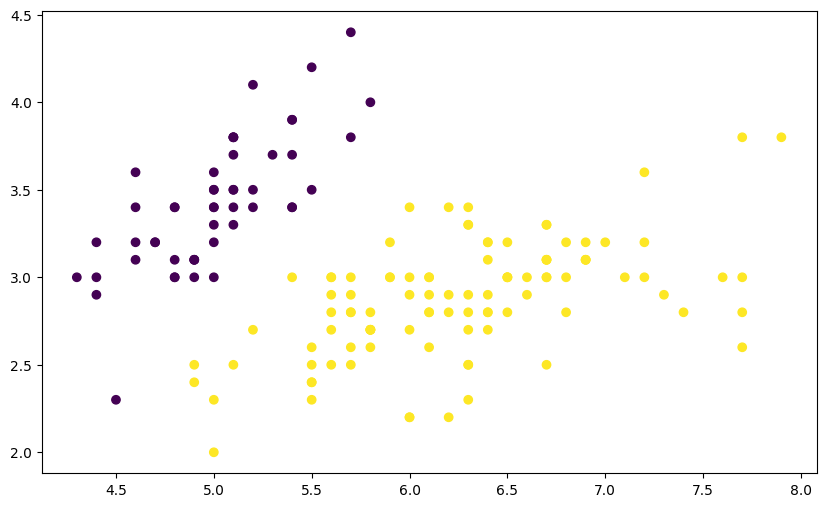

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

### 算法实现
数据分为两类，接下来，就运用逻辑回归完成对两类数据的划分。

In [3]:
import numpy as np


def sigmoid(z):
    """sigmoid函数"""
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid


def loss(h, y):
    """损失函数"""
    loss = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    return loss


def gradient(X, h, y):
    """计算梯度"""
    gradient = np.dot(X.T, (h - y)) / y.shape[0]
    return gradient


def Logistic_Regression(x, y, lr, num_iter):
    """逻辑回归过程(y=wx+b)"""
    # 初始化截距为 1
    intercept = np.ones((x.shape[0], 1))
    
    x = np.concatenate((intercept, x), axis=1)
    w = np.zeros(x.shape[1])   # 初始化参数为 0

    for i in range(num_iter):  # 梯度下降迭代
        z = np.dot(x, w)       # 线性函数
        h = sigmoid(z)         # sigmoid 函数
        g = gradient(x, h, y)  # 计算梯度
        w -= lr * g            # 通过学习率 lr 计算步长并执行梯度下降
        l = loss(h, y)         # 计算损失函数值

    return l, w                # 返回迭代后的梯度和参数

In [4]:
x = df[['X0', 'X1']].values
y = df['Y'].values
lr = 0.01         # 学习率
num_iter = 30000  # 迭代次数

# 训练
L = Logistic_Regression(x, y, lr, num_iter)
L

(0.05103697443193302, array([-1.47673791,  4.27250311, -6.9234085 ]))

### 结果展示
有了分类边界线函数，我们就可以将其绘制到原图中，看一看分类的效果到底如何。下面这段绘图代码涉及到 Matplotlib 绘制轮廓线，不需要掌握。

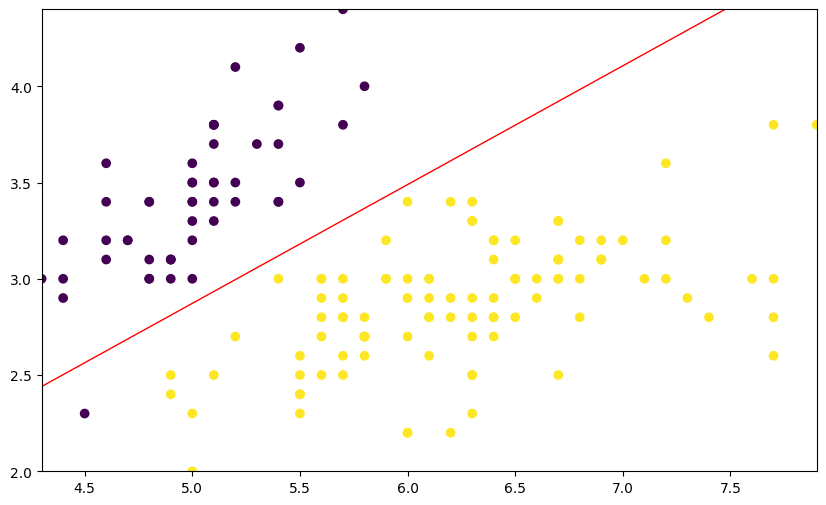

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['X0'], df['X1'], c=df['Y'])

x1_min, x1_max = df['X0'].min(), df['X0'].max(),
x2_min, x2_max = df['X1'].min(), df['X1'].max(),

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
                       np.linspace(x2_min, x2_max))

grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, np.array([L[1][1:3]]).T) + L[1][0]).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors='red')

## scikit-learn实现

### prepare数据

In [6]:
import pandas as pd

df = pd.read_csv("../data/course-8-data.csv", header=0)  # 加载数据集
x = df[['X0', 'X1']].values
y = df['Y'].values

### 算法实现

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(tol=0.001, max_iter=10000, solver='liblinear')  # 设置数据解算精度和迭代次数
model.fit(x, y)
model.coef_, model.intercept_

(array([[ 2.49579289, -4.01011301]]), array([-0.81713932]))

In [8]:
model.score(x, y)

0.9933333333333333

### 结果展示

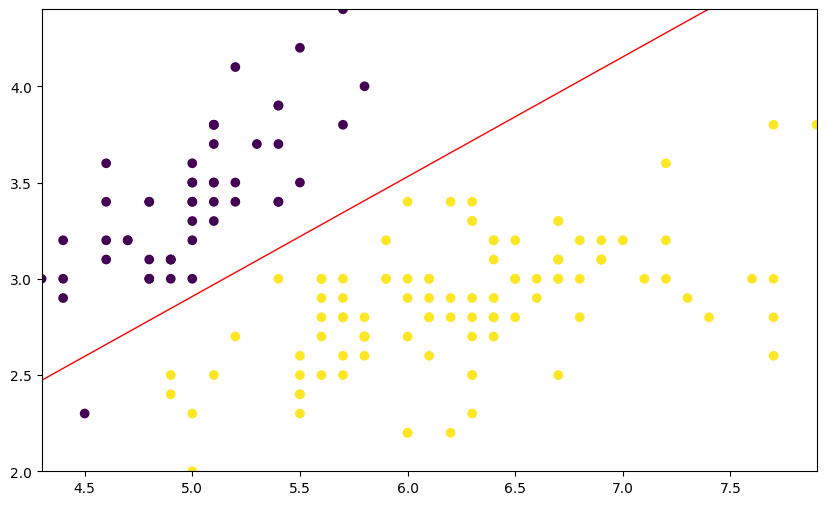

In [9]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(df["X0"], df["X1"], c=df["Y"])

x1_min, x1_max = df["X0"].min(), df["X0"].max()
x2_min, x2_max = df["X1"].min(), df["X1"].max()

xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]

probs = (np.dot(grid, model.coef_.T) + model.intercept_).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, levels=[0], linewidths=1, colors="red")